# Aula de estatística aplicada com Métodos Computacionais

### Pedro da Silveira Ferreira

In [3]:
!pip3 install pymp-pypi


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymp
import multiprocessing as mp
from tqdm import tnrange, tqdm, tqdm_notebook
from scipy.stats import poisson ,expon, norm, lognorm, t, binom
import time
from scipy import stats

## Números aleatórios e sorteio aleatório

In [2]:
#Números aleatórios
np.random.randint(1,100+1,size=100)
#np.unique(np.array([np.random.randint(10,12) for i in range(100000)]), return_counts=True)

array([90, 68, 95, 62, 66,  6, 64, 18, 60, 85, 70, 61, 13, 73, 80, 87, 79,
       30, 14, 29, 15, 57, 55, 84, 61, 75, 52, 60,  7, 64, 36,  4, 91, 61,
       20, 98, 60, 98, 12, 32,  2, 36, 59, 19, 22, 45,  9, 59,  1, 27, 41,
        3, 98, 67, 41, 18, 81, 71, 43, 68,  9, 28, 10,  7, 20, 62, 18, 23,
       50, 30, 79, 24, 88, 74, 65, 25, 45, 36, 13, 15, 70, 35, 49, 83, 35,
       21, 49, 41, 58, 33, 90, 49, 99, 26, 47, 24, 82, 82, 93, 80])

In [3]:
np.random.random(10)

array([0.64913483, 0.82951903, 0.58213346, 0.36290191, 0.40700686,
       0.49212258, 0.14404435, 0.96529141, 0.13030736, 0.79361725])

In [ ]:
np.random.rand(5,5) #matriz de numeros aleatorios. 5x5

array([[0.30655937, 0.13490017, 0.53432494, 0.48694882, 0.48926201],
       [0.95826864, 0.21643887, 0.6362783 , 0.43641081, 0.47606655],
       [0.33592589, 0.33731489, 0.96662225, 0.75999151, 0.41988   ],
       [0.73315543, 0.95198426, 0.0816775 , 0.95860041, 0.26434412],
       [0.08223295, 0.04499982, 0.11600887, 0.46667716, 0.83488306]])

In [ ]:
np.random.random_sample(10)

array([0.53906608, 0.71364605, 0.95868344, 0.90086805, 0.75837905,
       0.16371966, 0.26829832, 0.37025395, 0.86277442, 0.93577127])

In [4]:
#Sorteios aleatórios
a = np.arange(100)
np.random.choice(a,100,replace=True) #Escolhendo a amostra aleatoria. No caso, pegamos da amostra a, mesmo tamanho e COM reposição --> Bootstrap

array([38, 77, 55, 72, 75, 44, 43,  8, 77, 75, 71,  8, 47, 40, 38, 49, 92,
       32, 49, 64, 66, 25, 46, 42, 65, 24, 85, 72, 80, 86, 23, 71, 12, 21,
       26, 83, 34, 72, 43, 78, 32,  2,  1, 22, 78,  1, 26, 98, 78, 83,  9,
       99, 97, 95, 21, 12, 91, 74, 16, 30, 82, 63, 73, 53, 50, 92, 76, 61,
       98, 31, 43, 43,  6, 77, 10, 65, 66, 35, 84, 20, 27, 95,  9, 67, 26,
        9, 48, 70, 97, 66,  7, 17, 91, 72,  4, 22, 67, 12, 41, 16])

In [5]:
np.sort(np.random.choice(a,100,replace=True))

array([ 0,  0,  3,  3,  5,  5,  6,  6,  7,  8,  8,  8,  8,  9, 10, 10, 12,
       13, 13, 14, 16, 22, 23, 26, 26, 27, 28, 29, 30, 31, 32, 32, 34, 34,
       34, 37, 37, 37, 38, 39, 39, 40, 42, 44, 44, 44, 45, 47, 47, 47, 51,
       51, 52, 52, 52, 53, 55, 55, 56, 56, 57, 58, 58, 58, 59, 59, 62, 64,
       65, 65, 66, 69, 70, 71, 71, 74, 74, 75, 75, 77, 77, 80, 81, 81, 82,
       82, 82, 84, 88, 89, 89, 89, 90, 92, 94, 94, 95, 95, 96, 99])

In [ ]:
np.random.choice(a,100,replace=False) #Sem reposição, basicamente o array original copiado

array([41, 57, 23, 83, 47, 16, 21, 85, 67, 11, 36, 59, 48, 42, 84, 68, 99,
       60, 29, 74, 66, 44, 45,  8, 37,  3, 13, 77, 17, 95, 96, 89, 50, 71,
       72, 62, 28, 61, 86, 27, 51, 33, 91, 14, 63, 53, 79, 39, 73, 43, 69,
       30, 26, 56,  9, 58, 94, 12, 65, 52, 35, 82,  2, 93,  7, 76, 81, 34,
       49, 78, 10, 24, 20, 70, 38, 87, 92,  0, 98, 54, 97, 22, 15, 80,  6,
       19, 25, 31, 75,  5,  1, 88, 64, 90,  4, 40, 18, 55, 32, 46])

In [ ]:
np.sort(np.random.choice(a,100,replace=False))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Média, variância, desvio padrão, moda e mediana - Algumas grandezas para descrever uma amostra ou população

In [ ]:
#Média
np.mean(np.random.random_sample(10000))

0.4994546812498884

In [ ]:
#Variância
np.var(np.random.random_sample(10000))

0.08226142288795749

In [ ]:
#Desvio padrão
np.std(np.random.random_sample(10000))

0.28965223539704166

In [11]:
#Moda
#dessa forma há um problema c numeros negativos
a=np.random.randint(10,size=1000)
print(a)
print(stats.mode(a))

[6 9 7 2 2 3 9 8 9 1 3 0 6 0 9 9 1 6 0 5 6 8 3 2 1 0 6 5 2 4 0 9 8 2 0 7 4
 3 3 8 2 5 5 1 8 7 8 5 3 9 7 9 8 3 9 0 0 4 8 7 3 0 4 2 1 5 3 3 7 1 0 6 9 7
 0 4 7 0 9 6 2 5 1 4 5 4 8 0 1 9 0 8 8 8 1 1 0 8 4 2 3 8 2 7 2 6 5 1 9 9 0
 4 7 6 0 4 2 8 0 8 1 1 1 2 1 7 4 3 7 8 9 1 8 3 6 6 8 2 1 6 6 6 3 8 5 6 5 3
 7 8 8 0 8 8 1 5 6 9 3 4 7 0 3 2 7 8 1 5 6 8 6 6 6 3 5 6 9 0 1 0 4 5 4 3 3
 9 0 0 6 5 6 4 9 3 2 2 4 1 2 7 1 7 5 7 1 1 1 8 4 6 5 5 6 8 7 0 1 5 7 7 4 6
 8 4 6 0 4 9 3 4 7 9 4 4 5 6 0 9 1 4 1 6 5 5 8 9 8 9 9 3 0 7 9 9 8 4 8 5 1
 7 7 5 2 1 2 3 6 2 8 2 7 4 6 1 0 0 8 4 8 8 1 5 9 9 4 2 2 9 3 0 2 6 3 6 9 1
 1 4 2 7 3 3 7 4 7 6 9 2 4 1 6 3 6 8 1 1 1 5 3 6 4 8 4 2 5 6 9 6 6 0 3 2 3
 4 1 7 0 9 5 5 1 5 5 8 3 7 6 6 4 6 1 6 7 2 1 4 9 8 7 4 5 0 6 1 4 4 7 9 5 2
 3 4 3 2 5 4 1 4 6 1 7 5 8 9 9 3 0 1 4 5 3 0 9 4 2 6 6 1 7 9 9 7 1 3 0 2 9
 0 3 4 2 4 5 9 6 5 4 5 0 4 8 0 2 6 6 5 6 3 0 0 7 4 0 8 2 5 4 0 1 5 8 6 2 6
 7 8 5 0 4 4 4 1 2 1 1 5 1 6 6 7 8 7 4 9 9 3 0 0 0 7 6 0 2 9 5 8 2 4 6 4 4
 3 4 6 4 5 4 0 5 1 3 3 8 

In [12]:
#Outra forma de pegar a moda:
freqs=np.unique(a, return_counts=True)
freqs[0][np.argmax(freqs[1])] #recortando [0] --> número #argmax -> que tem maior frequencia
#freqs

1

In [ ]:
#Mediana --> centro
print(np.sort(a))
print(np.sort(a)[:int(a.size/2)]) #ordenando e recortando pelo meio
np.median(a) #pelo numpy

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

4.0

In [ ]:
np.sort(a)[int(a.size/2)]

4

## Distribuições de probabilidade (PDF e CDF)

*pdf : função de densidade e probabilidade --> qual prob cada elemento tem de ser medido*
*cdf: distribuição de probabilidade acumulada*

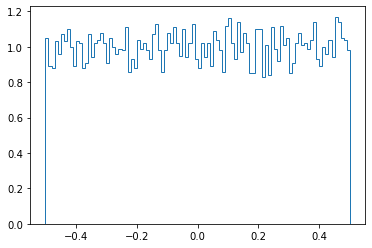

In [15]:
populacao = np.random.random_sample(10000)-0.5 #10.000 numeros aleatórios indo de -0.5 até +0.5

plt.hist(populacao,100,density=True,histtype='step') #PDF. Normalizada em 100bins density True
plt.show()

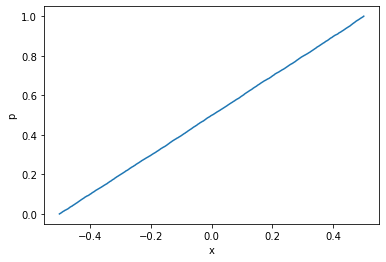

In [16]:
# Ordenando os dados:
populacao_ordenada = np.sort(populacao)
p = 1. * np.arange(len(populacao)) / (len(populacao) - 1) # -1 pra consertar o arrange semi-aberto. Cria-se um grande arrange de 0 até 1
#assim conseguimos a função acumulada por elemento. 1. arange --> ordena cada elemento da array com ponto
plt.plot(populacao_ordenada, p)
plt.xlabel('x')
plt.ylabel('p')
plt.show()


### Discretas

Binomial: 
É a distribuição de probabilidade discreta do número k de sucessos numa sequência de n tentativas tais que a
probabilidade de sucesso é p.

$$ f(k,n,p) = \binom{n}{k} p^k (1-p)^{n-k}  $$

Equação e variáveis.


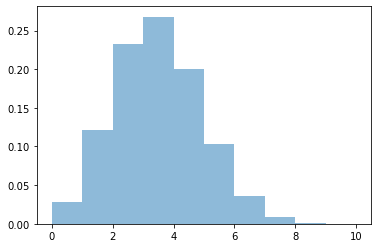

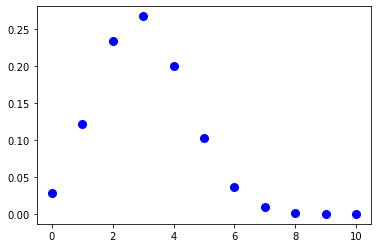

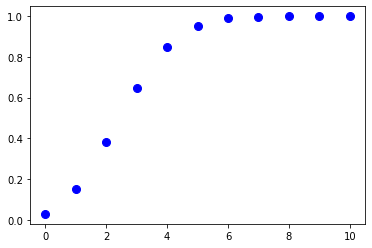

In [30]:
r_binomial = binom.rvs(10,p=0.3,size=1000000) #10 tentativas com probabi de 30% repetidas 1000000x
#binom.rvs(k,n,p)
plt.hist(r_binomial,10, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

x = np.arange(0,11)
#pdf: destribuição de prob -> Jogar 10vzs com 30% de acerto -> esperança=3 --> pico da função de prob. Mais chance de acertar 3 vezes.
plt.plot(x, binom.pmf(x, 10, 0.3), 'bo', ms=8, label='poisson pmf')
plt.show()
#cdf:funçao acumulada. A chance de acertar ao menos 1 vez ao jogar 10vzs tendo 30% de chance de acerto é quase 100%
plt.plot(x, binom.cdf(x, 10, 0.3), 'bo', ms=8, label='poisson pmf')
plt.show()

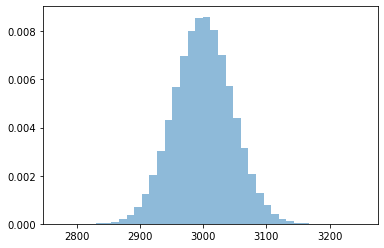

0.008824300000014773
0.008824300000014773


In [5]:
r_binomial = binom.rvs(10000,p=0.3,size=10000000) #aumentando o numero de tentativas.
plt.hist(r_binomial,40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()
#Conforme as tentativas vão aumentando, o grafico vai ganhando forma mais fiel ao de um sino.
freqs = np.unique(r_binomial, return_counts=True)
moda = freqs[0][np.argmax(freqs[1])]
#A diferença entre a media e mediana vai diminuindo, pois vai convergindo pro mesmo resultado
print(np.mean(r_binomial)-np.median(r_binomial))
print(np.mean(r_binomial)-moda)

Poisson:

Expressa a probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem independentemente de quando ocorreu o último evento. 

$$ f(k, \lambda) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Onde k é o número de ocorrências e $\lambda$ o número de ocorrências provável (se for por tempo teremos $\lambda t$). 

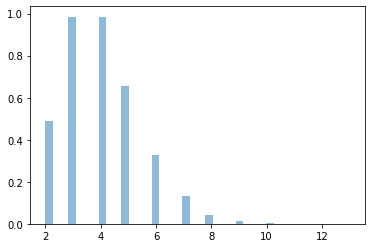

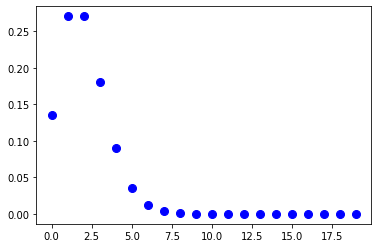

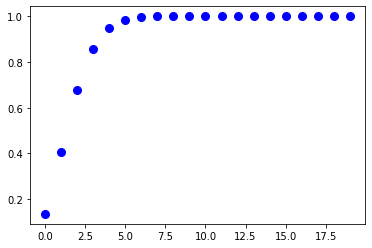

In [ ]:
r_poisson = poisson.rvs(2,2,size=1000000) # poisson.rvs(k=numero de ocorrencias,loc=deslocamento,lambda/mu = media das ocorrencias)
plt.hist(r_poisson,40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

x = np.arange(0,20)
#PDF
plt.plot(x, poisson.pmf(x, 2), 'bo', ms=8, label='poisson pmf')
plt.show()
#CDF
plt.plot(x, poisson.cdf(x, 2), 'bo', ms=8, label='poisson pmf')
plt.show()

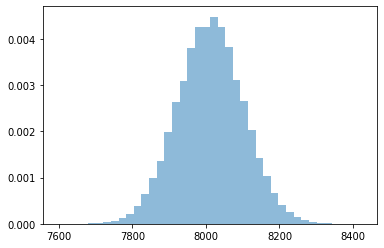

-0.1225350000004255
-9.122535000000425


In [ ]:
r_poisson = poisson.rvs(8000,loc=12,size=1000000)
plt.hist(r_poisson,40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

freqs = np.unique(r_poisson, return_counts=True)
moda = freqs[0][np.argmax(freqs[1])]

print(np.mean(r_poisson)-np.median(r_poisson))
print(np.mean(r_poisson)-moda)

## Distribuição Normal (Gaussiana)

A distribuição Normal é definida apenas por média e desvio padrão.

Nesse caso média = moda = mediana.

Formato de sino.

Ela é dada pela equação:

$$\rm{PDF} \rightarrow f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

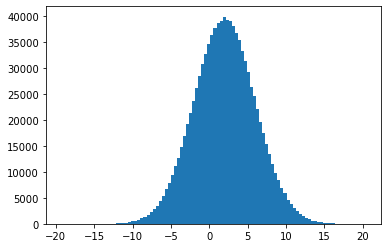

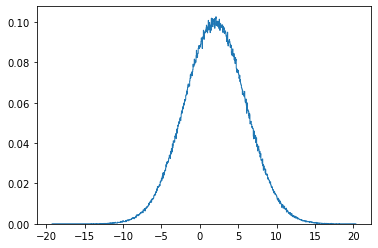

1.9951862087426393
1.994407285497454
1.9944204611780318


In [6]:
# Vamos testar isso
media = 2
desvio_padrao = 4
n_amostra = 10**6
normdist = norm.rvs(loc=media, scale=desvio_padrao,size=n_amostra)
plt.hist(normdist,100)
plt.show()
plt.hist(normdist,1000,density=True,histtype='step')
plt.show()
#Perceba o quanto a média, mediana e moda são proximas numa distribuição normal
print(np.mean(normdist))
print(np.median(normdist))
print(np.sort(normdist)[int(normdist.size/2)])

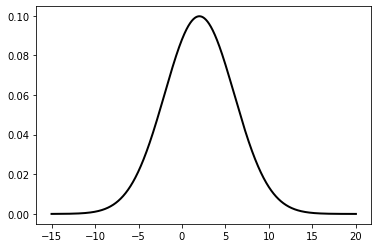

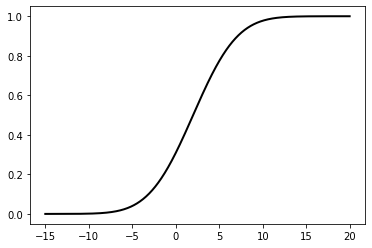

In [ ]:
# CDF e PDF
media = 2
desvio_padrao = 4
x=np.linspace(-15,20,1000)
plt.plot(x, norm.pdf(x,loc=media, scale=desvio_padrao), 'k-', lw=2) #Por ser função contínua podemos aplicar .pdf inés da pmf
plt.show()
plt.plot(x, norm.cdf(x,loc=media, scale=desvio_padrao), 'k-', lw=2)
plt.show()


Importância na natureza: Uma série de fenômenos físicos têm sua distribuições descritas pela distribuição Normal, principalmente em grandes amostras como vimos.
Além disso muitas distribuições convergem para a normal quando o tamanho da amostra aumenta. Porém, talvez a mais importante característica é a ligação entre esta distribuição e o Teorema do Limite Central, que veremos mais a frente.

Mas há outras distribuições muito comuns na natureza como a Log-normal, $\chi^2$ e exponencial.

## Distribuição Normal Padrão (ou padronizada)

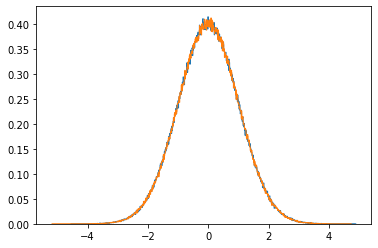

In [ ]:
media = 2
desvio_padrao = 4
n_amostra = 10**6
normdist = (norm.rvs(loc=media, scale=desvio_padrao,size=n_amostra)-media)/desvio_padrao #Mesma coisa-media/DP
plt.hist(normdist,1000,density=True,histtype='step')
media = 20
desvio_padrao = 40
n_amostra = 10**6
normdist = (norm.rvs(loc=media, scale=desvio_padrao,size=n_amostra)-media)/desvio_padrao
plt.hist(normdist,1000,density=True,histtype='step')
plt.show()
#Comparar a padrão anterior com a padronizada

### Gerando amostra através de uma distribuição binada

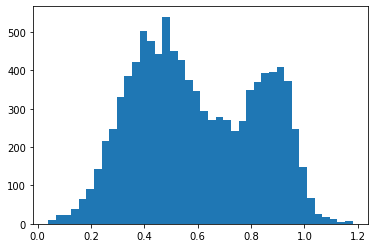

In [ ]:
#ler o arquivo e criar listas com os valores de cada coluna 
color = np.loadtxt("sdss_bimodal.dat", skiprows=1)[:,0]
n_gal = np.loadtxt("sdss_bimodal.dat", skiprows=1)[:,1]

#calcula a proporção de cada cor com base nos valores de n_gal e então gera uma população (100000 elelmentos) que segue essa proporção
proportion=[ x / sum(n_gal) for x in n_gal] #Basicamente, a probabilidade de cada cor
hist=np.random.choice(color, size=10000, p=proportion)
noise =(np.random.sample(10000)-0.5)/100
hist = hist+noise

#plota o histograma
plt.hist(hist, 40)
plt.show()

## Teorema do Limite Central

A distribuição das médias de uma amostra tende a uma distribuição Normal.
Quanto maior a amostra mais próximo de uma ditribuição normal.
Essa convergência não depende da distribuição da amostra.

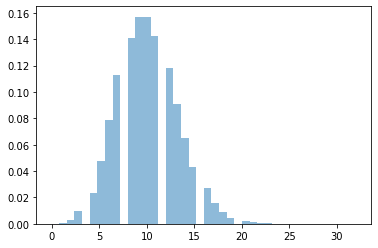

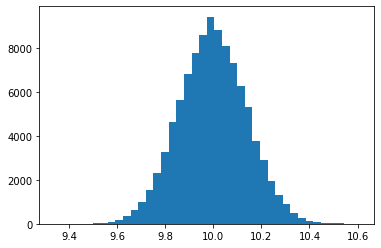

In [ ]:
r_poisson = poisson.rvs(10,loc=0,size=1000000)
plt.hist(r_poisson,40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()
media_lista = np.zeros(100000) # Alocando espaço para médias de 100000 amostras
for i in range(100000): # Aqui sorteamos 512 elementos da populão para cada amostra e calculamos a média
    media_lista[i] = np.mean(r_poisson[np.random.randint(r_poisson.size, size=512)])
    #soma da média de 512 elementos sorteados na distribuição dada
plt.hist(media_lista,40)
plt.show()

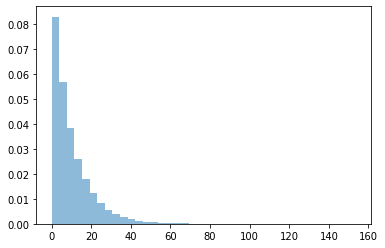

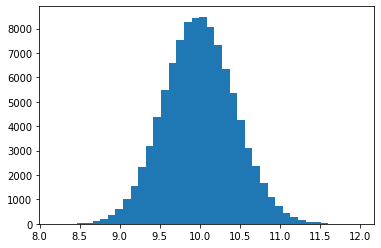

In [ ]:
r_exp = expon.rvs(loc=0, scale=10,size=1000000) 
plt.hist(r_exp,40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

media_lista = np.zeros(100000)
for i in range(100000):
    media_lista[i] = np.mean(r_exp[np.random.randint(r_exp.size, size=512)]) 
    #soma da média de 512 elementos sorteados na distribuição dada 
plt.hist(media_lista,40)
plt.show()

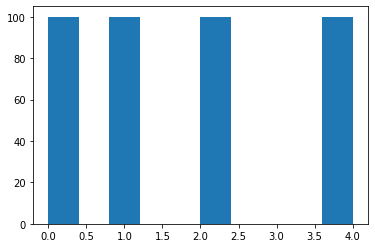

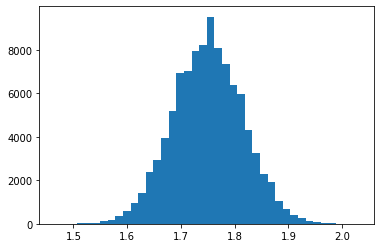

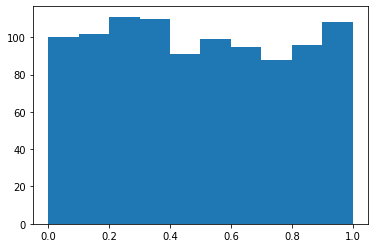

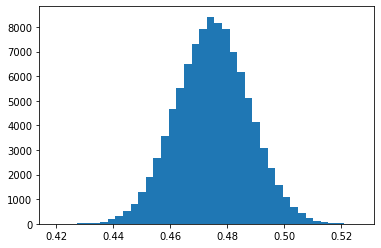

In [ ]:
histones = np.array([np.ones(100),4*np.ones(100),np.zeros(100),2*np.ones(100)]).flatten() #Exemplo doido
plt.hist(histones)
plt.show()

media_lista = np.zeros(100000)
for i in range(100000):
    media_lista[i] = np.mean(histones[np.random.randint(histones.size, size=512)])
plt.hist(media_lista,40)
plt.show()

histrandom = np.random.random_sample(1000) #teste totalmente aleatório
plt.hist(histrandom)
plt.show()

media_lista = np.zeros(100000)
for i in range(100000):
    media_lista[i] = np.mean(histrandom[np.random.randint(histones.size, size=512)])
plt.hist(media_lista,40)
plt.show()

* Ou seja, para cada amostra pega da população (que nos casos são as distribuições geradas), podemos tirar suas médias (como se fossem micro-populações) e estas se aproximarão de uma distribuição normal

## Erro padrão

É o desvio padrão da distribuição das amostras, normalmente é utilizado o erro padrão da média. Definição:

$$ \rm{Erro \; Padrão}  =\frac{\sigma}{\sqrt{N}} $$

O erro padrão da média é muito útil pois, devido ao teorema central do limite a distribuição das médias tente a uma distribuição Normal e portanto terá um desvio padrão associado. Isso significa que independentemente da distribuição original, temos um comportamento esperado para o erro padrão.

$$ \rm{Erro \; Padrão}  \propto  \frac{1}{\sqrt{N}} $$

A importância desse comportamento para a Astronomia por exemplo, é que dado o aumento do numero de elementos de uma amostra, meu erro tende a cair com o fator dado acima e por tando minha relação sinal ruído aumenta. Isto é, somando mais medidas podemos reduzir o erro da medida, porém esse erro não cai linearmente. 
Embora isso possa ser demonstrado matemáticamente, o que é feito em cursos mais avançados, aqui vamos demonstrar empiricamente, via força bruta, utilizando poder computacional. - Aliás isso é uma coisa interessante na Astronomia, muitas vezes problemas analiticos difícieis podem ser resolvidos de forma simples utilizando simulações, embora o nosso caso não seja complexo de demonstrar, apenas foge ao escopo do curso.

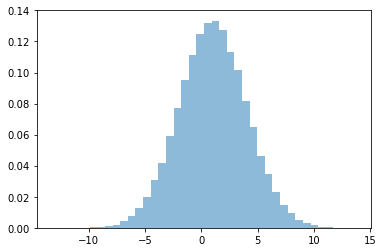

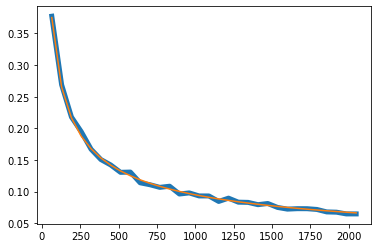

In [3]:
desvio_padrao = 3
media = 1
n_amostra = 100000

r_norm = norm.rvs(loc=media, scale=desvio_padrao,size=n_amostra) #População de 100.000 elementos
r = r_norm
plt.hist(r,40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

n_ell_max = 2048 # Número máximo de elementos por amostra
n_ell_min = 64 # Número mínimo //
n_ell_step = 64 # De quanto em quanto vamos variar o tamanho das amostras
media_lista = np.zeros(1000) #Alocando espaço pras 1.000 médias das amostras (ou seja, 1.000 amostras)
n_range = np.arange(n_ell_min,n_ell_max+n_ell_min,n_ell_step)
std_lista = pymp.shared.array((n_range.size), dtype='float64') #Lista com os DP
with pymp.Parallel(4) as p:
    for n_ell in p.range(n_range.size): #Variando o tamanho das amostras baseado nos maximo e minimos especificados
        for i in range(1000): # Sorteando as amostras
            media_lista[i] = np.mean(r[np.random.randint(r.size, size=n_range[n_ell])]) #Salvando as médias das amostras no espaço alocado
        std_lista[n_ell] = np.std(media_lista) # Calculando o desvio padrão das médias das amostras
plt.plot(n_range,std_lista,lw=5)
plt.plot(n_range,desvio_padrao*(np.sqrt(n_range))**(-1)) #Plotando os graficos do desvio padrão. Observa-se que quanto maior as amostras, menor o erro.
plt.show()

### Sinal/Ruído

A relação S/N é proporcional a $\frac{1}{\sqrt{N}}$, e está relacionada ao erro padrão. No caso das imagens, ao somarmos várias imagens e tirarmos a média, o ruído é atenuado pois a média das oscilações nos pixels tende a zero, ao mesmo tempo o sinal aumenta. É possível demonstrar matemáticamente essa proporcionalidade do S/N, porém aqui vamos verificar como podemos medir isso de uma forma numérica, computacional.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


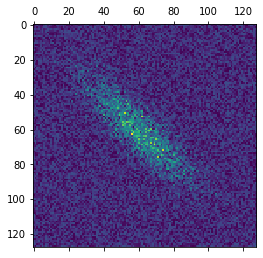

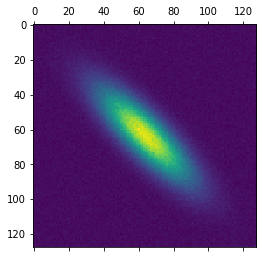

In [2]:
mean = [0, 0]
cov = [[1*8, 0], [7*8, 4*8]]
nimages = 512
res = 128
images = np.zeros((nimages,res,res))
for i in range(nimages):
    x, y = np.random.multivariate_normal(mean, cov, 4500).T
    counts, xedges, yedges = np.histogram2d(x, y, bins=res)
    noise = ((np.random.random(res*res)-0.5)*3).reshape([res,res])
    counts = counts + noise
    images[i] = counts
#    np.savetxt('ccd'+str(i+1)+'.dat',counts)
plt.matshow(counts)
plt.show()
plt.matshow(np.sum(images,axis=0)/images.shape[0])
plt.show()


## Reamostragem e  Intervalo de confiança

Esta técnica só foi possível com o advento do computador,
assim como tecnicas baseadas em MMC que veremos a seguir.

Como podemos estimar a margem de erro ou intervalo de segurança de um **parâmetro da população** a partir de uma **amostra da população**?

Utilizando a reamostragem. Temos algumas técnicas de reamostragem, porém a mais popular é a bootstrap. Nesta técnica nós consideramos que a amostra é uma distribuição empirica, uma primeira aproximação da distribuição de probabilidade real da população. Com esta hipótese, podemos sortear novas amostras, onde a probabildade de sortear um elemento é dada pela distribuição empirica. O que é mais interessante é que após um grande número de reamostragens, se a sua amostra inicial não for enviesada, a distribuição dos parâmetros medidos, como a média, nos fornecem uma margem de erro adequada para a medida, como veremos a seguir.

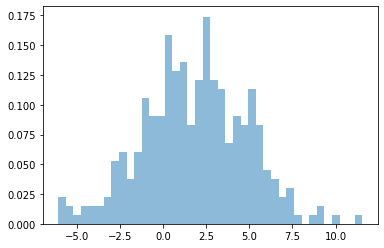

1.8430579101980713
3.0121186192440703


In [ ]:
desvio_padrao = 3
media = 2
n_amostra = 300

r_norm = norm.rvs(loc=media, scale=desvio_padrao,size=n_amostra)
r = r_norm
plt.hist(r,40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()
print(np.mean(r_norm))
print(np.std(r_norm))

1.8440015964411998
3.0128587574094574
0.17311421605732566
1.5022100731274333
2.186348299779184


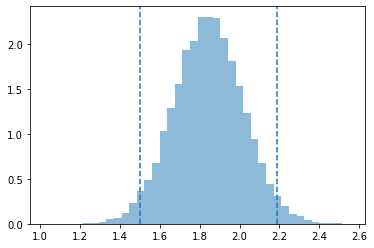

In [ ]:
bootstrap = np.array([np.random.choice(r_norm,size=n_amostra, replace=True) for i in range(30000)]) #sorteando 30k outras amostras, com base na amostra original e com mesmo tamanho, MAS com reposição. Por isso não é identica.
print(np.mean(bootstrap.flatten()))
print(np.std(bootstrap.flatten()))
print(np.std(np.mean(bootstrap,axis=1)))
print(np.quantile(np.mean(bootstrap,axis=1),0.025)) #calcula o valor pela qual temos p=2,5%
print(np.quantile(np.mean(bootstrap,axis=1),0.975)) # '' p=97,5% --> delimitando nosso 'meio' com 95% 
plt.hist(np.mean(bootstrap,axis=1),40, density=True, histtype='stepfilled', alpha=0.5)
plt.axvline(x=np.quantile(np.mean(bootstrap,axis=1),0.025), ls='--')
plt.axvline(x=np.quantile(np.mean(bootstrap,axis=1),0.975), ls='--')
plt.show()

0.6947095394134521
[-2.69728091 -1.62970465]


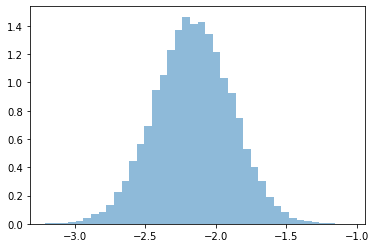

In [ ]:
def hdr_simple(array,p): ##Função que pega região de maior densidade (assim como acima pegamos os p95%)
    return np.array([np.quantile(array,(1-p)/2),np.quantile(array,1-(1-p)/2)])

def bootstrap_gen(array,n_amostras):
    bootstrap_samples = np.zeros((n_amostras,array.size))
    for amostra in range(n_amostras):
        bootstrap_samples[amostra]=np.random.choice(array,size=array.size, replace=True)
    return bootstrap_samples

desvio_padrao = 5
media = -2
n_amostra = 300

r_norm = norm.rvs(loc=media, scale=desvio_padrao,size=n_amostra)

start=time.time()
bootstrap = bootstrap_gen(r_norm,30000)
end=time.time()
print(end-start)
mean_dist = np.mean(bootstrap,axis=1)
print(hdr_simple(mean_dist,0.95))
plt.hist(np.mean(bootstrap,axis=1),40, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

1ª amostra com  1000  pessoas
2ª amostra com  10000  pessoas
3ª amostra com  100000  pessoas


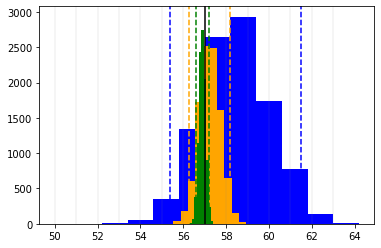

[55.4 61.5]
[56.25 58.19]
[56.578 57.19 ]


In [ ]:
n_populacao = 100000000
tamanhos_amostras = np.array([1000,10000,100000])
colors = ['blue','orange','green']
n_canditado_a = int(n_populacao*0.43) #se soubessemos, estes seriam os votos de cada candidato
n_canditado_b = int(n_populacao*0.57)
votos_a = np.repeat(0,n_canditado_a)
votos_b = np.repeat(1,n_canditado_b)
votos_populacao = np.append(votos_a,votos_b)
np.random.shuffle(votos_populacao)
np.random.shuffle(votos_populacao)
amostras_p_bootstrap = [votos_populacao[np.random.randint(votos_populacao.size, size=i)] for i in tamanhos_amostras]
print("1ª amostra com ",amostras_p_bootstrap[0].size," pessoas")
print("2ª amostra com ",amostras_p_bootstrap[1].size," pessoas")
print("3ª amostra com ",amostras_p_bootstrap[2].size," pessoas")
n_resamples = 10000 #Cada uma das amostras, faremos n_resamples reamostragens

for i in range(50,64): #Plot das linhas de cada amostragem
    plt.axvline(x=i, color='grey',alpha=0.1)

bootstrap_dists = [[np.random.choice(amostras_p_bootstrap[s], size=amostras_p_bootstrap[s].size,replace=True) for i in range(n_resamples)] for s in range(3)]
#distribuição bootstrap -- > pega amostra de 1.000 pessoas e sorteio (c reposição) 10.000 vezes e crio 10k novas amostras
bootstrap_prop = [np.array([(bootstrap_dists[s][i][bootstrap_dists[s][i]==1].size/tamanhos_amostras[s])*100 for i in range(n_resamples)]) for s in range(3)]
#Proporção --> contando quantas pessoas votaram no tal candidato em cada nova-amostragem que criamos acima
for s in range(3):
    plt.hist(bootstrap_prop[s],color=colors[s])
plt.axvline(x=57, color='k')

#Intervalo de confiança de 95%
#erro da regiao de maior densidade
error_ranges_bootstrap_05 = [hdr_simple(bootstrap_prop[s],0.95) for s in range(3)]

for i in range(3):
    plt.axvline(x=error_ranges_bootstrap_05[i][0], color=colors[i], ls='--')
    plt.axvline(x=error_ranges_bootstrap_05[i][1], color=colors[i], ls='--')
plt.show()

for i in range(3):
    print(error_ranges_bootstrap_05[i])
plt.show()

In [ ]:
(error_ranges_bootstrap_05[1][0]-error_ranges_bootstrap_05[1][1])/2

-0.9699999999999989

Agora já sabemos como os institutos de estatística fazem uma pesquisa eleitoral. 

Esse método serve para estimar os intervalos de confiança de qualquer medida. Na lista, além do caso com 3 candidatos (no lugar de 0 e 1 use 'a','b' e 'c' e conte os casos) veremos o caso também de aglomerados de galáxias.

### Para verificar que essas margens de erro são adequadas basta compararmos com a distribuição de resultados quando no lugar realizar a reamostragem, pegamos várias amostras da população original. Vamos verificar a distribuição dessas amostras e qual o intervalo de confiança dos valores (se são compatíveis com aqueles obtidos via reamostragem). Lembrando que na prática isso não é possível, a reamostragem é feita por conta de que só temos uma amostra disponível, e não toda a população, e por isso temos que extrair o máximo de informação disponível nela.

[54.     59.7025]
[56.01 57.95]
[56.70495 57.29315]


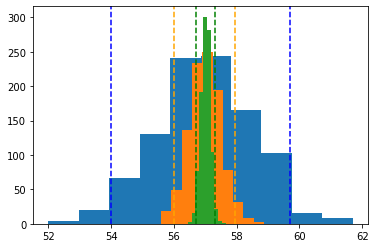

In [ ]:
amostras_sorteadas =[
np.array([votos_populacao[np.random.randint(votos_populacao.size, size=tamanhos_amostras[s])] 
 for i in range(1000)]) 
 for s in range(3)]
amostras_porcent =[
np.array([(amostras_sorteadas[s][a][amostras_sorteadas[s][a] == 1].size/amostras_sorteadas[s][a].size)*100
for a in range(1000)])
for s in range(3)]
plt.hist(amostras_porcent[0])
plt.hist(amostras_porcent[1])
plt.hist(amostras_porcent[2])

error_ranges_amostras_05 = [hdr_simple(amostras_porcent[s],0.95) for s in range(3)]

for i in range(3):
    plt.axvline(x=error_ranges_amostras_05[i][0], color=colors[i], ls='--')
    plt.axvline(x=error_ranges_amostras_05[i][1], color=colors[i], ls='--')

for i in range(3):
    print(error_ranges_amostras_05[i])
plt.show()

In [ ]:
(np.array(error_ranges_bootstrap_05)-np.array(error_ranges_amostras_05))/np.array(error_ranges_amostras_05)

array([[ 0.02592593,  0.03010762],
       [ 0.00428495,  0.0041415 ],
       [-0.00223878, -0.00180039]])

Logo totalmente compatível com o erro real das amostras! O ideal seria ainda calcular o erro relatico com relação as medidas, o que reduziria ainda mais a diferença entre os erros.

Resumindo:
* Quando a amostra não possui viés, a reamostragem pode fornecer uma ótima aproximação para o erro da medida.

Isso só é possível com métodos computacionais - Nos exemplos utilizei 10000 reamostragens, porém foi uma escolha para que ficasse leve o código, na literatura normalmente são utilizados 100000 ou mais.

## Método de Monte Carlo (MMC) - Ideia

Se baseia em grandes amostragens aleatórias para obter resultados numéricos, isto é, 
repetindo sucessivas simulações um elevado número de vezes, para calcular probabilidades empiricamente.
É muito utilizado em tecnidas de ray tracing e renderização, pois pode-se ir aumentando a precisão com
o tempo (aumentando o número de sorteios). - Para um exemplo com aplicação em renderização de imagens veja (https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-rendering-practical-example).
Aqui nós vamos estudar apenas a integração.
Uma vantagem é que o erro da integral cai com $\sqrt{N}$ independente do número de dimensões, logo para integrais em espaços com muitas dimensões o uso de MMC é bastante indicado.

Podemos calcular a integral pela media

* vantagem $\rightarrow$ mais simples
![title](mmc_media.png)

Ou contando os pontos dentro e fora da região 

* vantagem $\rightarrow$ cálcula a área total sem necessidade de encontrar regiões de mudança de sinal

![title](mmc_contando.png)

Algumas referências:

* 1 https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration
* 2 https://planetmath.org/montecarlosimulation

### Integrais

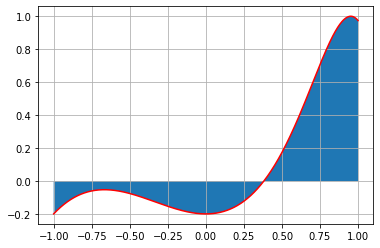

calculado em: 0.11508607864379883  segs
O valor da integral é igual a 0.17473938387233295


In [ ]:
def mc_integral_simple(func, xmin, xmax, npoints):
    base = (xmax - xmin)
#    x_sample = xmin+(xmax-xmin)*np.random.random_sample((npoints,))
    x_sample = np.random.uniform(low=xmin, high=xmax, size=(npoints,))
    y_sample = np.apply_along_axis(func,0,x_sample)
    return np.mean(y_sample) * base # base vezes altura média

def f(x):
    return np.sin(x**3 + x**2 - 0.2)

x = np.arange(-1,1+1/1000,1/1000)
y2 = np.apply_along_axis(f,0,x)
plt.plot(x,y2,c='r')
plt.fill_between(x, y2,0)
plt.grid()
plt.show()

start = time.time()
int_b = mc_integral_simple(f, -1, 1, 1000000)
end = time.time()
print('calculado em:',end-start,' segs')
print("O valor da integral é igual a",int_b)

Na lista faça a integral desta forma e também contando os pontos. sorteados acima e abaixo da função.

## Conclusão

Usamos sorteios e análise estatística, considerando diversas propriedades das distribuições, como o teorema do limite central, para calcular grandezas importantes e extrair informações que antes pareciam não existir, usando algumas hipóteses.

Aprendemos:
* Como gerar números aleatórios;
* Como estimar parâmetros estatísticos básicos;
* A importância do teorema do limite central;
* Qual a relação entre o tamanho da amostra e o S/N;
* Como estimar o intervalo de confiânça de parâmetros via bootstrap (uma técnica bastante usada na astronomia).
* O conceito básico do MMC.